In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron as SkPerceptron
from sklearn.metrics import mean_squared_error

"""
Assignment 2: Neural networks
Part 3.3: Perceptron

Implementation of a perceptron.
"""

class Perceptron:
    def __init__(self, learning_rate, max_iter):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.w = None

    def fit(self, x_train, y_train):
        assert x_train.shape[0] == y_train.shape[0], "x and y should have the same number of rows"
        self._fit(x_train, y_train)
        assert self.w.shape == (x_train.shape[1], 1)
        return self

    def predict(self, x):
        assert x.shape[1] == self.w.shape[0]
        y_predictions = self._predict(x)
        y_predictions = np.array(y_predictions)
        assert y_predictions.shape[0] == x.shape[0], "Predictions should have the same number of rows as the input x"
        assert np.bitwise_or(y_predictions == 0, y_predictions == 1).all(), "predictions have to be 0 or 1"
        return y_predictions

    def _fit(self, x_train, y_train):
        #init weights
        if self.w == None:
            #self.w = np.zeros(x_train.shape[1])
            self.w =np.random.rand(x_train.shape[1])
            self.w = np.transpose(np.expand_dims(self.w, axis=0))

        
        #iter
        for i in range(self.max_iter):
            false_counter = 0
            y_pred = self.predict(x_train)

            #samples
            for samp in range(x_train.shape[0]):
                if y_pred[samp] != y_train[samp]:
                    self.w[:,0] = self.w[:,0] + self.learning_rate*(y_train[samp]-y_pred[samp])*x_train[samp]
                    false_counter += 1
            if false_counter == 0:
                return
        
        ## TODO
        pass

    def _predict(self, x):
        a=np.dot(x,self.w[:,0])
        z=np.heaviside(a,1)
        return z


def load_data():
    x, y = make_blobs(n_features=2, centers=2, random_state=3)
    print("x shape is:", x.shape)
    print("y shape is:", y.shape)
    print(y)
    assert np.bitwise_or(y == 0, y == 1).all()
    return x, y


def load_non_linearly_separable_data():
    """
    Generates non-linearly separable data and returns the samples and class labels
    :return:
    """
    x, y = make_gaussian_quantiles(n_features=2, n_classes=2, random_state=1)
    assert np.bitwise_or(y == 0, y == 1).all()
    return x, y


def plot_data(x, y):
    plt.figure()
    plt.title("Two linearly-separable classes", fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=y)
    # plt.show()


def plot_decision_boundary(perceptron, x, y,name):
    dim1_max, dim1_min = np.max(x[:, 0]), np.min(x[:, 0])
    dim2_max, dim2_min = np.max(x[:, 1]), np.min(x[:, 1])
    dim1_vals, dim2_vals = np.meshgrid(np.arange(dim1_min, dim1_max, 0.1),
                                       np.arange(dim2_min, dim2_max, 0.1))
    y_vals = perceptron.predict(np.c_[dim1_vals.ravel(), dim2_vals.ravel()])
    y_vals = y_vals.reshape(dim1_vals.shape)

    plt.figure()
    plt.title("Two linearly-separable classes with decision boundary", fontsize='small')
    plt.contourf(dim1_vals, dim2_vals, y_vals, alpha=0.4)
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=y)
    plt.savefig(name+".pdf")



x shape is: (100, 2)
y shape is: (100,)
[1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1]
Training MSE: 0.0
Testing MSE:  0.0
Training MSE: 0.0
Testing MSE:  0.0


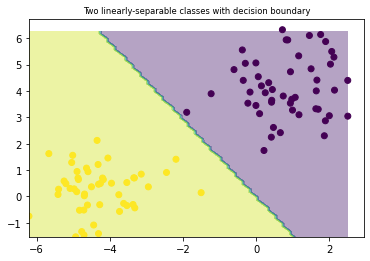

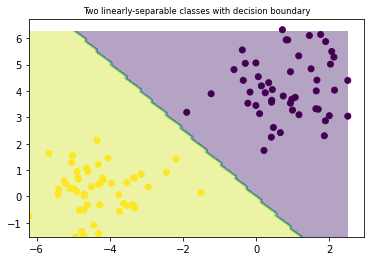

In [4]:

x, y = load_data()
#x, y = load_non_linearly_separable_data()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

learning_rate = 0.1
n_iter = 100

# Perceptron from sklearn
perceptron = SkPerceptron(alpha=learning_rate, max_iter=n_iter, fit_intercept=False)
perceptron.fit(x_train, y_train)
train_mse = mean_squared_error(y_train, perceptron.predict(x_train))
test_mse = mean_squared_error(y_test, perceptron.predict(x_test))
print("Training MSE:", train_mse)
print("Testing MSE: ", test_mse)
plot_decision_boundary(perceptron, x, y,"sklearn")


# Your own perceptron
perceptron = Perceptron(learning_rate=learning_rate, max_iter=n_iter)
perceptron.fit(x_train, y_train)
train_mse = mean_squared_error(y_train, perceptron.predict(x_train))
test_mse = mean_squared_error(y_test, perceptron.predict(x_test))
print("Training MSE:", train_mse)
print("Testing MSE: ", test_mse)
plot_decision_boundary(perceptron, x, y,"myper")
plt.show()

In [42]:
self.w.shape 

NameError: name 'self' is not defined